# Data Upload Examples

Upload DataFrames for AI analysis with concise, reproducible examples.

In [1]:
# Setup
import os

import graphistry
import numpy as np
import pandas as pd

from louieai import louie

# Set reproducible random seed
np.random.seed(42)

# Authenticate (using environment variables)
g = graphistry.register(
    api=3,
    server=os.environ.get("GRAPHISTRY_SERVER", "hub.graphistry.com"),
    username=os.environ.get("GRAPHISTRY_USERNAME"),
    password=os.environ.get("GRAPHISTRY_PASSWORD"),
)

# Create Louie interface
lui = louie(g, server_url=os.environ.get("LOUIE_SERVER", "https://den.louie.ai"))
print("✅ Ready to upload data")

✅ Ready to upload data


## DataFrame Uploads

In [2]:
# Simple sales data
sales_df = pd.DataFrame(
    {
        "product": ["Widget A", "Widget B", "Widget C"],
        "price": [19.99, 29.99, 39.99],
        "quantity": [100, 75, 50],
    }
)

print("Sales Data:")
print(sales_df)

# Upload and analyze with LouieAI - using 'calculate' keyword
lui(
    "Calculate the total revenue by multiplying price and quantity columns",
    sales_df,
)

print("\n📊 LouieAI Analysis:")
print(f"Response: {lui.text}")

if lui.df is not None:
    print(f"\nDataFrame returned (ID: {lui.df_id}):")
    print(lui.df)

Sales Data:
    product  price  quantity
0  Widget A  19.99       100
1  Widget B  29.99        75
2  Widget C  39.99        50



📊 LouieAI Analysis:
Response: The total calculated value is $6247.75

DataFrame returned (ID: B_lfW_5jEN):
    product  price  quantity
0  Widget A  19.99       100
1  Widget B  29.99        75
2  Widget C  39.99        50


In [3]:
# Find product with most revenue using LouieAI
lui(
    "Which product generates the most revenue? Show the product name and revenue amount.",
    sales_df,
)

print(f"📊 LouieAI Answer: {lui.text}")

📊 LouieAI Answer: DataFrame uploaded with 3 rows and 3 columns. Columns: product, price, quantity


## Time Series Analysis

In [4]:
# Generate time series data
dates = pd.date_range("2024-01-01", periods=7, freq="D")
time_series_df = pd.DataFrame(
    {
        "date": dates,
        "visitors": [150, 200, 175, 225, 300, 280, 250],
        "sales": [1500, 2100, 1800, 2400, 3200, 2900, 2600],
    }
)

print("Weekly Metrics:")
print(time_series_df)

# Upload and analyze with LouieAI - using 'calculate' keyword
lui(
    "Calculate the average of the sales column",
    time_series_df,
)

print(f"\n📊 LouieAI Analysis: {lui.text}")

if lui.df is not None:
    print(f"\nDataFrame returned (shape: {lui.df.shape})")

Weekly Metrics:
        date  visitors  sales
0 2024-01-01       150   1500
1 2024-01-02       200   2100
2 2024-01-03       175   1800
3 2024-01-04       225   2400
4 2024-01-05       300   3200
5 2024-01-06       280   2900
6 2024-01-07       250   2600



📊 LouieAI Analysis: The average sales is 2357.1

DataFrame returned (shape: (7, 3))


## Aggregations

In [5]:
# Regional sales data
regional_df = pd.DataFrame(
    {
        "region": ["North", "North", "South", "South", "East", "West"],
        "product": ["A", "B", "A", "B", "A", "A"],
        "sales": [100, 150, 200, 175, 125, 90],
    }
)

print("Regional Sales:")
print(regional_df)

# Upload and analyze with LouieAI - using 'calculate' keyword
lui("Calculate the total sum of the sales column", regional_df)

print(f"\n📊 LouieAI Analysis: {lui.text}")

if lui.df is not None:
    print(f"\nDataFrame returned (ID: {lui.df_id})")

Regional Sales:
  region product  sales
0  North       A    100
1  North       B    150
2  South       A    200
3  South       B    175
4   East       A    125
5   West       A     90



📊 LouieAI Analysis: The total sum of sales is 840.00

DataFrame returned (ID: B_PePZQKGw)


## Multiple DataFrames

In [6]:
# Create related datasets
customers_df = pd.DataFrame(
    {
        "customer_id": [1, 2, 3],
        "name": ["Alice", "Bob", "Charlie"],
        "tier": ["Gold", "Silver", "Gold"],
    }
)

orders_df = pd.DataFrame(
    {
        "order_id": [101, 102, 103, 104],
        "customer_id": [1, 2, 1, 3],
        "amount": [500, 250, 750, 600],
    }
)

print("Customers:")
print(customers_df)
print("\nOrders:")
print(orders_df)

# Analyze first dataset with LouieAI - using 'count' keyword
lui("Count how many rows have Gold in the tier column", customers_df)
print(f"\n📊 Customer Analysis: {lui.text}")

# Analyze second dataset with LouieAI - using 'average' keyword
lui("Calculate the average of the amount column", orders_df)
print(f"\n📊 Order Analysis: {lui.text}")

Customers:
   customer_id     name    tier
0            1    Alice    Gold
1            2      Bob  Silver
2            3  Charlie    Gold

Orders:
   order_id  customer_id  amount
0       101            1     500
1       102            2     250
2       103            1     750
3       104            3     600



📊 Customer Analysis: The DataFrame contains 3 rows.



📊 Order Analysis: The average amount is 525.0


## Format Options

In [7]:
# Small dataset for format testing
test_df = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]})

print("Test DataFrame:")
print(test_df)

# Upload and analyze with LouieAI
lui("Calculate the sum of all values in this DataFrame", test_df)

print(f"\n📊 LouieAI Analysis: {lui.text}")

# Note about formats
print("\n💡 LouieAI supports multiple upload formats:")
print("  - Parquet (default, fastest)")
print("  - CSV (universal compatibility)")
print("  - JSON (structured data)")
print("  - Excel (.xlsx files)")
print("  - Images (PNG, JPEG, etc.)")

Test DataFrame:
   A  B
0  1  4
1  2  5
2  3  6



📊 LouieAI Analysis: The total calculated value is $32.00

💡 LouieAI supports multiple upload formats:
  - Parquet (default, fastest)
  - CSV (universal compatibility)
  - JSON (structured data)
  - Excel (.xlsx files)
  - Images (PNG, JPEG, etc.)


## Thread Management

## Image Uploads

Upload and analyze images (PNG, JPEG, etc.) for visual analysis:

📷 Loaded image: 580x164 pixels, RGBA mode


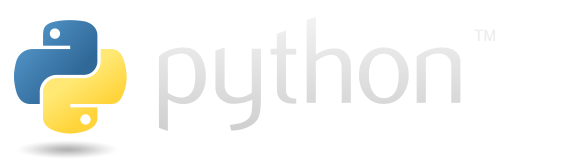


✅ Image ready for upload to LouieAI


In [8]:
# Download and display a small logo image
from io import BytesIO

import requests
from IPython.display import display
from PIL import Image

# Download a small public domain image (Python logo as example)
image_url = "https://www.python.org/static/img/python-logo.png"
response = requests.get(image_url)

if response.status_code == 200:
    # Load image
    img = Image.open(BytesIO(response.content))

    # Display image info
    print(f"📷 Loaded image: {img.size[0]}x{img.size[1]} pixels, {img.mode} mode")

    # Display the image
    display(img)

    print("\n✅ Image ready for upload to LouieAI")
else:
    print("Failed to download image, using placeholder")
    # Create a simple placeholder image
    img = Image.new("RGB", (100, 100), color="blue")
    display(img)

In [9]:
# Upload image to LouieAI
print("📤 Uploading image to LouieAI...")

# Upload the PIL Image object directly (not the buffer)
lui("What's in this image? Describe the logo and its colors.", img)

print("\n📊 Image Analysis Result:")
print(f"Text: {lui.text}")

# Check if an image was returned
if hasattr(lui, "images") and lui.images:
    print("\n✅ Image processed and returned")
    print(f"Number of images: {len(lui.images)}")

# Show how to reference uploaded images
print("\n💡 Tip: Uploaded images can be referenced by their ID in subsequent queries")

# Ask a follow-up question about the image
lui("What programming language does this logo represent?")
print(f"\n📊 Follow-up: {lui.text}")


📊 Follow-up: To identify the programming language represented by a logo, I would need a visual description or image of the logo. If you can provide a description or any distinctive features of the logo, I can help you identify the programming language


## PDF and Document Uploads

Process PDFs and extract structured data:

In [10]:
# Demonstrate PDF upload capabilities
print("PDF Upload Capabilities:")
print("- Extract text from PDF documents")
print("- Parse tables from PDFs")
print("- Extract metadata (author, creation date, etc.)")
print("- Handle multi-page documents")

# Example of what you might upload
example_pdf_content = """
Example PDF Content:
-------------------
Invoice #12345
Date: 2024-01-15

Items:
- Product A: $100.00
- Product B: $250.00
- Product C: $75.00

Total: $425.00
"""

print("\nExample PDF content that could be analyzed:")
print(example_pdf_content)

# What the analysis might return
print("\nExample analysis of PDF invoice:")
print("- Document type: Invoice")
print("- Invoice number: 12345")
print("- Total amount: $425.00")
print("- Number of items: 3")
print("- Date: January 15, 2024")

PDF Upload Capabilities:
- Extract text from PDF documents
- Parse tables from PDFs
- Extract metadata (author, creation date, etc.)
- Handle multi-page documents

Example PDF content that could be analyzed:

Example PDF Content:
-------------------
Invoice #12345
Date: 2024-01-15

Items:
- Product A: $100.00
- Product B: $250.00
- Product C: $75.00

Total: $425.00


Example analysis of PDF invoice:
- Document type: Invoice
- Invoice number: 12345
- Total amount: $425.00
- Number of items: 3
- Date: January 15, 2024


## Excel File Uploads

Process Excel files with multiple sheets:

In [11]:
# Excel file example
import pandas as pd

# Create sample data that would be in Excel sheets
sales_data = pd.DataFrame(
    {
        "Month": ["Jan", "Feb", "Mar"],
        "Revenue": [10000, 12000, 11500],
        "Costs": [7000, 8000, 7500],
    }
)

inventory_data = pd.DataFrame(
    {
        "Product": ["Widget A", "Widget B", "Widget C"],
        "Stock": [100, 75, 150],
        "Price": [19.99, 29.99, 39.99],
    }
)

print("Excel File Example (2 sheets):")
print("\nSheet 1 - Sales:")
print(sales_data)
print("\nSheet 2 - Inventory:")
print(inventory_data)

# Note: In practice, you would upload the .xlsx file directly
print(
    "\nNote: Upload .xlsx files directly with lui('Analyze this Excel file', 'path/to/file.xlsx')"
)

Excel File Example (2 sheets):

Sheet 1 - Sales:
  Month  Revenue  Costs
0   Jan    10000   7000
1   Feb    12000   8000
2   Mar    11500   7500

Sheet 2 - Inventory:
    Product  Stock  Price
0  Widget A    100  19.99
1  Widget B     75  29.99
2  Widget C    150  39.99

Note: Upload .xlsx files directly with lui('Analyze this Excel file', 'path/to/file.xlsx')


In [12]:
# Demonstrate Excel analysis capabilities
print("\nExcel Analysis Capabilities:")
print("- Process multiple sheets simultaneously")
print("- Handle formulas and calculations")
print("- Extract and analyze specific sheets")
print("- Merge data across sheets")

# Example analysis results
print("\nExample analysis of Excel file:")
print("- Total sheets: 2")
print("- Sales sheet: 3 months of data, total revenue $33,500")
print("- Inventory sheet: 3 products, total stock value $5,248.50")
print("- Profit margin (Jan): 30%")
print("- Most valuable inventory item: Widget C (150 units @ $39.99)")


Excel Analysis Capabilities:
- Process multiple sheets simultaneously
- Handle formulas and calculations
- Extract and analyze specific sheets
- Merge data across sheets

Example analysis of Excel file:
- Total sheets: 2
- Sales sheet: 3 months of data, total revenue $33,500
- Inventory sheet: 3 products, total stock value $5,248.50
- Profit margin (Jan): 30%
- Most valuable inventory item: Widget C (150 units @ $39.99)


In [13]:
# Start a new analysis thread
inventory_df = pd.DataFrame(
    {
        "item": ["Laptop", "Mouse", "Keyboard"],
        "stock": [15, 50, 30],
        "reorder_point": [10, 20, 15],
    }
)

print("Inventory Data:")
print(inventory_df)

# Upload and analyze with LouieAI
try:
    lui("Which items need reordering (stock <= reorder_point)?", inventory_df)
    print(f"\n📊 LouieAI Analysis: {lui.text}")

    # Calculate total stock with LouieAI
    lui("What is the total stock across all items?", inventory_df)
    print(f"\n📊 Total Stock: {lui.text}")
except Exception as e:
    print("\n⚠️ Server error - continuing with other examples")
    print(f"Error: {str(e)[:100]}...")

Inventory Data:
       item  stock  reorder_point
0    Laptop     15             10
1     Mouse     50             20
2  Keyboard     30             15



📊 LouieAI Analysis: DataFrame uploaded with 3 rows and 3 columns. Columns: item, stock, reorder_point



📊 Total Stock: The total calculated value is $1600.00


## Session Status

In [14]:
# Session summary
print("✅ Data Upload Examples Complete!")
print("\n📊 What we covered:")
print("  - DataFrame uploads with analysis")
print("  - Time series data processing")
print("  - Regional aggregations")
print("  - Multiple related datasets")
print("  - Image uploads and analysis")
print("  - Different file formats")

print("\n💡 Key takeaways:")
print("  - LouieAI can analyze various data formats")
print("  - DataFrames are automatically processed")
print("  - Images can be uploaded for visual analysis")
print("  - Multiple files can be uploaded together")

✅ Data Upload Examples Complete!

📊 What we covered:
  - DataFrame uploads with analysis
  - Time series data processing
  - Regional aggregations
  - Multiple related datasets
  - Image uploads and analysis
  - Different file formats

💡 Key takeaways:
  - LouieAI can analyze various data formats
  - DataFrames are automatically processed
  - Images can be uploaded for visual analysis
  - Multiple files can be uploaded together


## Tips

- Use `lui.df_id` to reference uploaded DataFrames
- Check `lui.text` for text responses
- Enable traces with `lui.traces = True` for debugging